# Loglinear Models in NLTK

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random
import pprint
from nltk.classify.maxent import MaxentClassifier
from nltk.classify.util import names_demo, names_demo_features

print("Features used to classify a name as male or female:")
pp = pprint.PrettyPrinter(indent=4)
test_features = names_demo_features("anoop")
pp.pprint(test_features)

Features used to classify a name as male or female:
{   'alwayson': True,
    'count(a)': 1,
    'count(b)': 0,
    'count(c)': 0,
    'count(d)': 0,
    'count(e)': 0,
    'count(f)': 0,
    'count(g)': 0,
    'count(h)': 0,
    'count(i)': 0,
    'count(j)': 0,
    'count(k)': 0,
    'count(l)': 0,
    'count(m)': 0,
    'count(n)': 1,
    'count(o)': 2,
    'count(p)': 1,
    'count(q)': 0,
    'count(r)': 0,
    'count(s)': 0,
    'count(t)': 0,
    'count(u)': 0,
    'count(v)': 0,
    'count(w)': 0,
    'count(x)': 0,
    'count(y)': 0,
    'count(z)': 0,
    'endswith': 'p',
    'has(a)': True,
    'has(b)': False,
    'has(c)': False,
    'has(d)': False,
    'has(e)': False,
    'has(f)': False,
    'has(g)': False,
    'has(h)': False,
    'has(i)': False,
    'has(j)': False,
    'has(k)': False,
    'has(l)': False,
    'has(m)': False,
    'has(n)': True,
    'has(o)': True,
    'has(p)': True,
    'has(q)': False,
    'has(r)': False,
    'has(s)': False,
    'has(t)': Fa

In [2]:
print("Train loglinear classifier and run on some example input names:")
def mytrain(train_toks):
    return MaxentClassifier.train(train_toks, max_iter=5)
loglinear = names_demo(mytrain)

Train loglinear classifier and run on some example input names:
Training classifier...
  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.370
             2          -0.61189        0.630
             3          -0.59849        0.630
             4          -0.58583        0.631
         Final          -0.57390        0.637
Testing classifier...
Accuracy: 0.6340
Avg. log likelihood: -0.8718

Unseen Names      P(Male)  P(Female)
----------------------------------------
  Kelli            0.3185  *0.6815
  Er              *0.4190   0.5810
  Ally             0.3498  *0.6502
  Stephan         *0.4124   0.5876
  Chriss           0.3985  *0.6015


In [3]:
from nltk.classify.naivebayes import NaiveBayesClassifier
print("Train NaiveBayes classifier and run on some example input names:")
naivebayes = names_demo(NaiveBayesClassifier.train)

Train NaiveBayes classifier and run on some example input names:
Training classifier...
Testing classifier...
Accuracy: 0.7820
Avg. log likelihood: -0.7476

Unseen Names      P(Male)  P(Female)
----------------------------------------
  Kelli            0.0132  *0.9868
  Er              *0.8826   0.1174
  Ally             0.0903  *0.9097
  Stephan         *0.8361   0.1639
  Chriss           0.6864  *0.3136


In [4]:
name='vivian'
print("Run trained classifier on input name:", name)
test_features = names_demo_features(name)
output = loglinear.prob_classify(test_features)
print("P(male|{0})={1}".format(name,output.prob('male')))
print("P(female|{0})={1}".format(name,output.prob('female')))
loglinear.explain(test_features)

Run trained classifier on input name: vivian
P(male|vivian)=0.3195339612553724
P(female|vivian)=0.6804660387446277
  Feature                                           female    male
  ----------------------------------------------------------------
  count(v)==2 (1)                                    0.044
  endswith=='n' (1)                                 -0.028
  count(i)==2 (1)                                    0.020
  has(i)==True (1)                                   0.016
  has(a)==True (1)                                   0.016
  startswith=='v' (1)                                0.013
  has(n)==True (1)                                   0.012
  count(o)==0 (1)                                    0.011
  has(o)==False (1)                                  0.011
  count(r)==0 (1)                                    0.010
  has(r)==False (1)                                  0.010
  count(a)==1 (1)                                    0.009
  count(w)==0 (1)                          

In [7]:
loglinear.show_most_informative_features()

  -0.317 endswith=='a' and label is 'male'
  -0.208 endswith=='p' and label is 'female'
  -0.202 endswith=='v' and label is 'female'
  -0.193 count(v)==2 and label is 'male'
  -0.164 endswith=='f' and label is 'female'
  -0.152 endswith=='m' and label is 'female'
  -0.146 endswith=='d' and label is 'female'
  -0.122 endswith=='o' and label is 'female'
  -0.118 count(a)==3 and label is 'male'
  -0.110 endswith=='u' and label is 'female'


## Loglinear Model for Prepositional Phrase Attachment

In [5]:
from nltk.corpus import ppattach
print("Total:",len(ppattach.attachments('training')))
item = random.choice(ppattach.attachments('training'))
print(item)

Total: 20801
PPAttachment(sent='9688', verb='won', noun1='approval', prep='from', noun2='Board', attachment='V')


In [6]:
from nltk.classify import accuracy

def j(*args):
    return '::'.join(list(args))

def print_feats(feats):
    width1, width2 = 25,30
    print("{:<{col1}} {:<{col2}}".format('Feature Type','Feature Value',col1=width1,col2=width2))
    print(width1*"-" + width2*"-")
    for k, v in feats.items():
        print("{:<{col1}} {:<{col2}}".format(k,v,col1=width1,col2=width2))

# verb='join', noun1='board', prep='as', noun2='director'
def ppattach_feature(item):
    return {
        'prep': item.prep,
        'verb': item.verb,
        'noun1': item.noun1,
        'noun2': item.noun2,
        'prep+noun1': j(item.prep, item.noun1),
        'prep+noun2': j(item.prep, item.noun2),
        'noun1+noun2': j(item.noun1, item.noun2),
        'verb+noun1': j(item.verb, item.noun1),
        'verb+noun2': j(item.verb, item.noun2),
        'verb+prep': j(item.verb, item.prep),
        'noun1+prep': j(item.noun1, item.prep),
        'prep+noun2': j(item.prep, item.noun2),
        'verb+noun1+noun2': j(item.verb, item.noun1, item.noun2),
        'verb+prep+noun2': j(item.verb, item.prep, item.noun2),
        'noun1+prep+noun2': j(item.noun1, item.prep, item.noun2),
        'verb+noun1+prep': j(item.verb, item.noun1, item.prep),
        'verb+noun1+prep+noun2': j(item.verb, item.noun1, item.prep, item.noun2),
        }

print_feats(ppattach_feature(item))

Feature Type              Feature Value                 
-------------------------------------------------------
prep                      from                          
verb                      won                           
noun1                     approval                      
noun2                     Board                         
prep+noun1                from::approval                
prep+noun2                from::Board                   
noun1+noun2               approval::Board               
verb+noun1                won::approval                 
verb+noun2                won::Board                    
verb+prep                 won::from                     
noun1+prep                approval::from                
verb+noun1+noun2          won::approval::Board          
verb+prep+noun2           won::from::Board              
noun1+prep+noun2          approval::from::Board         
verb+noun1+prep           won::approval::from           
verb+noun1+prep+noun2     won::a

In [7]:
train_set = [ (ppattach_feature(item), item.attachment) for item in ppattach.attachments('training') ]
dev_set = [ (ppattach_feature(item), item.attachment) for item in ppattach.attachments('devset') ]
test_set = [ (ppattach_feature(item), item.attachment) for item in ppattach.attachments('test') ]
print("starting to train classifier ...")
maxent_classifier = MaxentClassifier.train(train_set, algorithm='IIS', max_iter=10, count_cutoff=5)
print("finished training classifier")
devacc = accuracy(maxent_classifier, dev_set)
testacc = accuracy(maxent_classifier, test_set)
print("all:dev:%lf" % (devacc))
print("all:test:%lf" % (testacc))

starting to train classifier ...
  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.478
             2          -0.29111        0.970
             3          -0.20642        0.986
             4          -0.16328        0.992
             5          -0.13608        0.995
             6          -0.11710        0.996
             7          -0.10300        0.997
             8          -0.09208        0.997
             9          -0.08335        0.997
         Final          -0.07621        0.997
finished training classifier
all:dev:0.842040
all:test:0.840168


### Comparison with Naive Bayes

In [11]:
from nltk.classify import NaiveBayesClassifier
print("starting to train classifier ...")
nb_classifier = NaiveBayesClassifier.train(train_set)
print("finished training classifier")
devacc = accuracy(nb_classifier, dev_set)
testacc = accuracy(nb_classifier, test_set)
print("all:dev:%lf" % (devacc))
print("all:test:%lf" % (testacc))

starting to train classifier ...
finished training classifier
all:dev:0.837584
all:test:0.837908


### Learning Curves

Train on increasing size of training data and track accuracy on the development set.

starting to train classifier ...
  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.486
             2          -0.28175        0.988
             3          -0.20531        0.997
             4          -0.16289        0.998
         Final          -0.13537        0.999
finished training classifier
accuracy on dev set for training size 2000 = 0.782867
starting to train classifier ...
  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.493
             2          -0.27395        0.982
             3          -0.19784        0.995
             4          -0.15679        0.998
         Final          -0.13035        0.998
finished training classifier
accuracy on dev set for training size 4000 = 0.796979
starting to train classifier ...
  ==> Training (5 iterations)

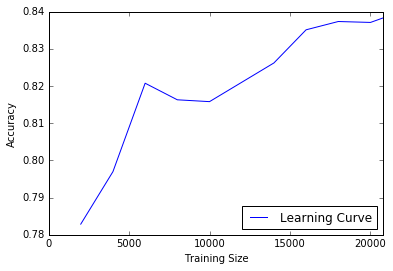

In [10]:
chunk_size = 2000 
x_axis = []
y_axis = []

def training_run(data, iters):
    print "starting to train classifier ..."
    #classifier = NaiveBayesClassifier.train(train_slice)
    classifier = MaxentClassifier.train(train_slice, algorithm='IIS', max_iter=iters, count_cutoff=5)
    print "finished training classifier"
    acc = accuracy(classifier, dev_set)
    print "accuracy on dev set for training size %d = %f" % (slice, acc)
    return acc
    
for slice in range(len(train_set)):
    if slice > 0 and slice % chunk_size == 0:
        train_slice = train_set[:slice]
        acc = training_run(train_slice,5)
        x_axis.append(slice)
        y_axis.append(acc)

acc = training_run(train_set,10)
x_axis.append(len(train_set))
y_axis.append(acc)

plt.xlim( (1,len(train_set)) )
plt.plot(x_axis, y_axis, label='Learning Curve')

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

### Increasing the number of iterations

In [11]:
print("starting to train classifier ...")
maxent_classifier = MaxentClassifier.train(train_set, algorithm='IIS', max_iter=100, count_cutoff=5)
print("finished training classifier")
devacc = accuracy(maxent_classifier, dev_set)
testacc = accuracy(maxent_classifier, test_set)
print("all:dev:%lf" % (devacc))
print("all:test:%lf" % (testacc))

starting to train classifier ...
  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.478
             2          -0.29111        0.970
             3          -0.20642        0.986
             4          -0.16328        0.992
             5          -0.13608        0.995
             6          -0.11710        0.996
             7          -0.10300        0.997
             8          -0.09208        0.997
             9          -0.08335        0.997
            10          -0.07621        0.997
            11          -0.07024        0.997
            12          -0.06519        0.997
            13          -0.06085        0.997
            14          -0.05708        0.997
            15          -0.05378        0.997
            16          -0.05086        0.997
            17          -0.04827        0.997
            18          -0.04594        0.997
            19

In [12]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../css/notebook.css", "r").read()
    return HTML(styles)
css_styling()